In [39]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random

# Define the MovielensInteractionGraph class
class MovielensInteractionGraph:
    def __init__(self, user_data, item_data, edges):
        self.user_data = user_data
        self.item_data = item_data
        self.edges = edges
        self.all_edges = set(edges)


# Function to visualize the interaction graph with items on one side and users on the other
def visualize_interaction_graph(igraph, sample_size=100):
    G = nx.Graph()

    # Sample edges to visualize
    sampled_edges = list(igraph.all_edges)
    if sample_size < len(sampled_edges):
        sampled_edges = random.sample(sampled_edges, sample_size)

    # Add edges from the interaction graph
    for edge in sampled_edges:
        user_id, item_id = edge
        G.add_edge(f"user_{user_id}", f"item_{item_id}")

    # Separate users and items
    user_nodes = [node for node in G.nodes if node.startswith("user_")]
    item_nodes = [node for node in G.nodes if node.startswith("item_")]

    # Create a bipartite layout
    pos = {}
    pos.update((node, (1, i)) for i, node in enumerate(user_nodes))  # Users on the left
    pos.update((node, (2, i)) for i, node in enumerate(item_nodes))  # Items on the right

    # Draw the graph
    plt.figure(figsize=(12, 12))
    nx.draw(G, pos, with_labels=True, node_size=50, node_color=['skyblue' if node.startswith("user_") else 'lightgreen' for node in G.nodes], font_size=8, font_weight='bold')
    plt.title(f"User-Item Interaction Graph (Sampled {sample_size} edges)")
    plt.show()

# Function to visualize user interactions
def visualize_user_interactions(igraph, user_id, sample_size=50):
    G = nx.Graph()

    # Filter edges for the specified user
    user_edges = [edge for edge in igraph.edges if edge[0] == user_id]
    if sample_size < len(user_edges):
        user_edges = random.sample(user_edges, sample_size)

    # Add edges from the interaction graph
    for edge in user_edges:
        _, item_id = edge
        G.add_edge(f"user_{user_id}", f"item_{item_id}")

    # Separate users and items
    user_nodes = [f"user_{user_id}"]
    item_nodes = [f"item_{item_id}" for _, item_id in user_edges]

    # Create a bipartite layout
    pos = {}
    pos.update((node, (1, i)) for i, node in enumerate(user_nodes))  # Users on the left
    pos.update((node, (2, i)) for i, node in enumerate(item_nodes))  # Items on the right

    # Draw the graph
    plt.figure(figsize=(12, 12))
    nx.draw(G, pos, with_labels=True, node_size=50, node_color=['skyblue' if node.startswith("user_") else 'lightgreen' for node in G.nodes], font_size=8, font_weight='bold')
    plt.title(f"Interactions of User {user_id} (Sampled {sample_size} edges)")
    plt.show()
 

In [40]:

# Load the data (replace these file paths with the actual paths to your data)
users_file_path = 'DATASET/ml-1m/users.dat'
ratings_file_path = 'DATASET/ml-1m/ratings.dat'
movies_file_path = 'DATASET/ml-1m/movies.dat'

# Read the data into DataFrames with the correct encoding
users_df = pd.read_csv(users_file_path, sep='::', engine='python', names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'], encoding='ISO-8859-1')
ratings_df = pd.read_csv(ratings_file_path, sep='::', engine='python', names=['UserID', 'MovieID', 'Rating', 'Timestamp'], encoding='ISO-8859-1')
movies_df = pd.read_csv(movies_file_path, sep='::', engine='python', names=['MovieID', 'Title', 'Genres'], encoding='ISO-8859-1')


In [41]:

# Convert DataFrames to the required format
user_data = users_df.set_index('UserID').to_dict('index')
item_data = movies_df.set_index('MovieID').to_dict('index')
edges = [tuple(x) for x in ratings_df[['UserID', 'MovieID']].to_numpy()]


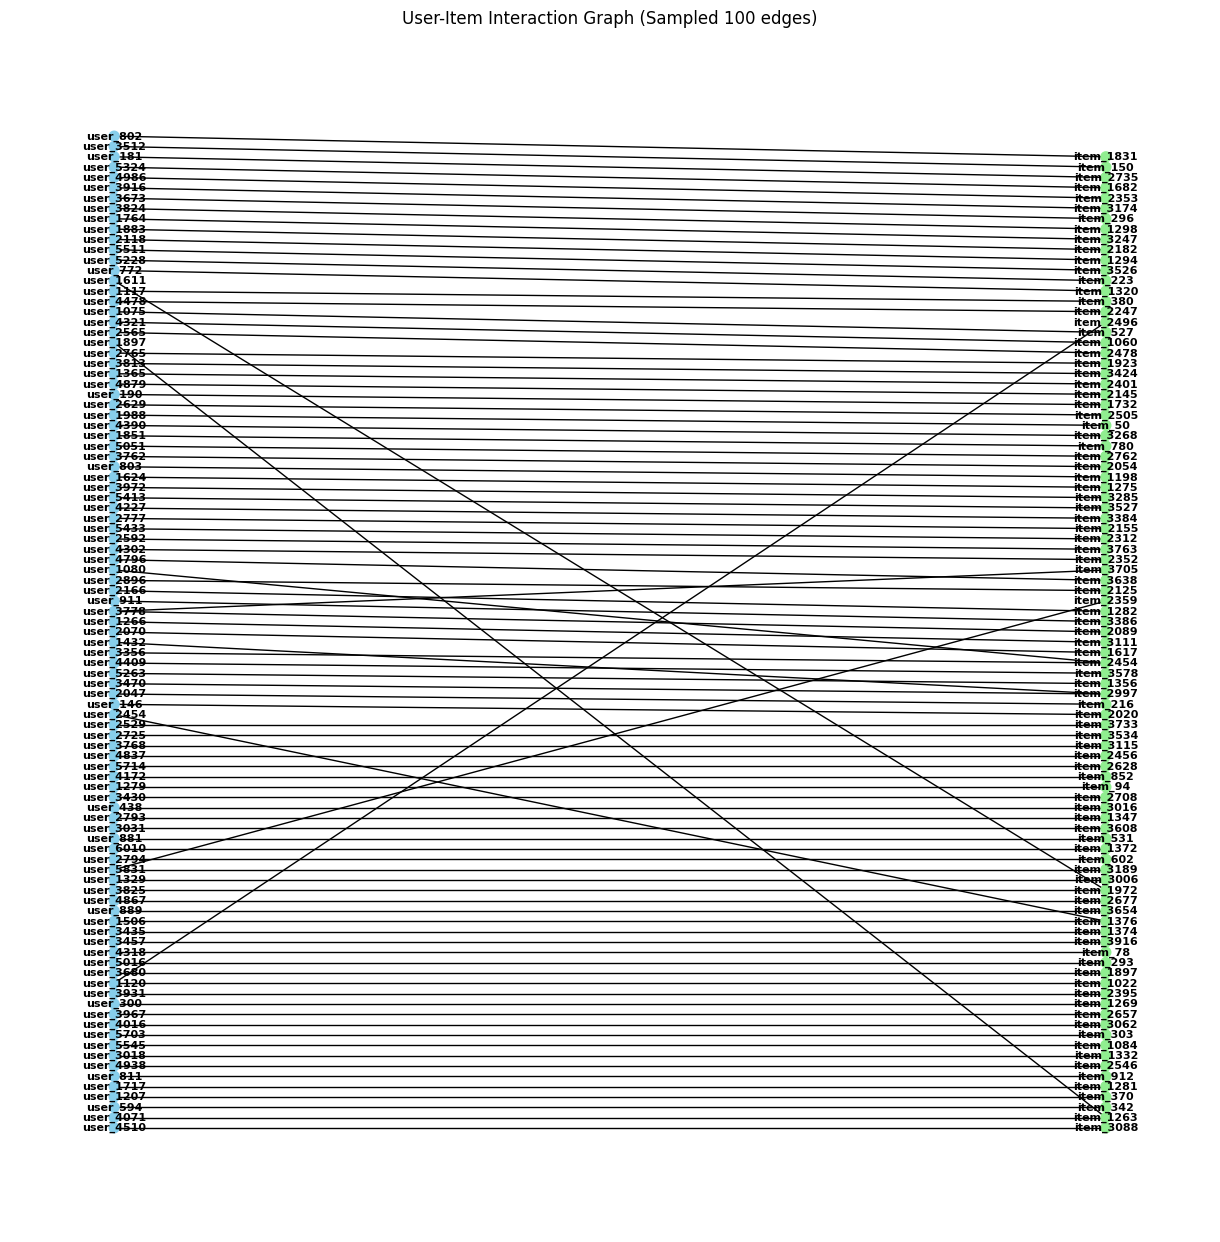

In [42]:
# Create the interaction graph
igraph = MovielensInteractionGraph(user_data, item_data, edges)

# Visualize the graph with a sample size
visualize_interaction_graph(igraph, sample_size=100)